# Pattern search
Pattern search is a simple method for searching for the optimal solution, which has resemblance to numerical gradients. If the parameter space $\vec{x} \in \mathbb{R}^n$ is $n$-dimensional in the real numbers, then the most common pattern search method calculates the objective function in all $2n$ directions in the $n$-dimensional space. (Any other set of search directions can also be implemented with the same method.)

Let $\mathcal{D}=\{d_0,d_1,d_2,\dots,d_{2n}\}$ be a set where $d_0 = 0$ is the zero vector, while $d_i$ for $i>0$ are the $2n$ directions in the $n$-dimensional space. Note again that $\mathcal{D}$ could theoretically be any other set of vectors, but this is the typical set of directions. In our example $\lVert d_i \rVert = 1$ for all $i>0$, however, the lengths could be different if they correspond to physical quantities with different range spans (e.g., if one dimension is temperatures with a typical range between 15 and 25 degrees, while another dimension is pressure with a typical range between 0 and 5 million Pascal, then the $d_i$-vector in the pressure direction $i$ is typically chosen much longer than the vector $d_j$ in the temperature direction $j$). Further, let $f \colon \mathbb{R}^n \to \mathbb{R}$ be the objective function, $\Delta_t$ a tolerance and $\gamma$ a step-length contraction factor. Let $\vec{x}^{(0)} \in \mathbb{R}^n$ be the starting point, and an initial step-length is given by $\Delta^{(0)}$.

For each iteration $m$, there exists a $i \in [0,2n]$ such that $f(\vec{x}^{(m)} + d_i \Delta^{(m)})$ is minimal, i.e., $f(\vec{x}^{(m)} + d_i \Delta^{(m)}) \leq f(\vec{x}^{(m)} + d_j \Delta^{(m)})$ for all $j \not= i$. If $i = 0$, then the smallest function value is the current point. We will then stay in the same point, while we reduce the step-length by a factor $\gamma$, thus we let $\Delta^{(m+1)} = \gamma \Delta^{(m)}$ and $\vec{x}^{(m+1)} = \vec{x}^{(m)}$. When $i \not= 0$, then the function is smaller at the point in direction $d_i$. We will then move to this new point with smaller function evaluation, while we keep the step-length the same: $\Delta^{(m+1)} = \Delta^{(m)}$ and $\vec{x}^{(m+1)} = \vec{x}^{(m)}+ d_i \Delta^{(m)}$.

Below we will use the patter search for an example case.


Move central point 3 (-1.0, 1.0) (-0.5, 1.0)
Move central point 2 (-0.5, 1.0) (-0.5, 0.5)
Move central point 2 (-0.5, 0.5) (-0.5, 0.0)
Move central point 2 (-0.5, 0.0) (-0.5, -0.5)
Reduce step size 0.5 0.25
Move central point 1 (-0.5, -0.5) (-0.75, -0.5)
Reduce step size 0.25 0.125
Move central point 3 (-0.75, -0.5) (-0.625, -0.5)
Reduce step size 0.125 0.0625


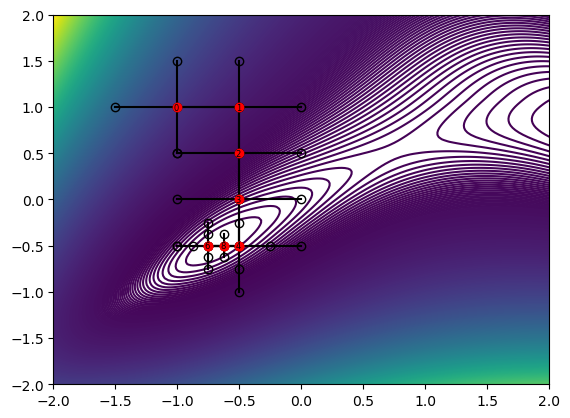

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

def hObjectiveFunction(fx,fy):
    return np.abs((3 - fx)*fx-3*fy+1.0)**(7.0/3.0)+np.abs((3-fy)*fy-fx+1.0)**(7.0/3.0)

fDelta = 0.025
aafy, aafx = np.mgrid[slice(-2.0, 2.0 + fDelta, fDelta),slice(-2.0, 2.0 + fDelta, fDelta)]
plt.contour(aafx, aafy, hObjectiveFunction(aafx,aafy),1000)#, cmap=cm.Purples_r)

def plotCross(afCentralPoint,fStepLength,aafDirections):
    afPointsToPlot=np.copy(aafDirections)*fStepLength
    afPointsToPlot[:,0]=afPointsToPlot[:,0]+afCentralPoint[0]
    afPointsToPlot[:,1]=afPointsToPlot[:,1]+afCentralPoint[1]
    plt.plot((afPointsToPlot[1][0],afPointsToPlot[3][0]),(afPointsToPlot[1][1],afPointsToPlot[3][1]),color='k')
    plt.plot((afPointsToPlot[2][0],afPointsToPlot[4][0]),(afPointsToPlot[2][1],afPointsToPlot[4][1]),color='k')
    plt.plot(afPointsToPlot[1:,0],afPointsToPlot[1:,1],'o',mfc='none',mec='k')
    return None


## Pattern search (Compass search)
# Initial point, and step length
afCentralPoint=(-1.0,1.0)
fStepLength=0.5

hListOfPoints=[]
hListOfPoints.append(afCentralPoint)
# Tolerance, and contraction factor
fTolerance=0.1
fContraction=0.5
#fEnlarge=1.2
# Search directions
aafDirections=np.array([[0.0,0.0],[-1.0,0.0],[0.0,-1.0],[1.0,0.0],[0.0,1.0]])

while (fStepLength>fTolerance):
    plotCross(afCentralPoint,fStepLength,aafDirections)
    afTestPoints=np.copy(aafDirections)*fStepLength
    afTestPoints[:,0]=afTestPoints[:,0]+afCentralPoint[0]
    afTestPoints[:,1]=afTestPoints[:,1]+afCentralPoint[1]
    iMinDir=np.argmin(hObjectiveFunction(afTestPoints[:,0],afTestPoints[:,1]))
    if iMinDir>0:
        print('Move central point',iMinDir,afCentralPoint,(afTestPoints[iMinDir,0],afTestPoints[iMinDir,1]))
        afCentralPoint=(afTestPoints[iMinDir,0],afTestPoints[iMinDir,1])
#        fStepLength=fEnlarge*fStepLength
    else:
        print('Reduce step size',fStepLength,fStepLength*fContraction)
        fStepLength=fStepLength*fContraction
    hListOfPoints.append(afCentralPoint)

ii=-1
corr = -0.03
prevPoint=(-10,-10)
for afCentralPoint in hListOfPoints:
    ii+=1
    plt.plot(afCentralPoint[0],afCentralPoint[1],'o',mfc='r',mec='r')#,markersize=10)
    if afCentralPoint==prevPoint:
        None
    else:
        prevPoint=afCentralPoint
        plt.annotate(str(ii),  xy=(afCentralPoint[0] + corr, afCentralPoint[1] + corr),fontsize=6)

plt.show()
